## Checking Best possible Model

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor


In [3]:
data = pd.read_csv('data/StudentsPerformance.csv')
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### Creating target variable Total score

In [4]:
data['total score'] = data['math score'] + data['writing score'] + data['reading score']
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282
996,male,group C,high school,free/reduced,none,62,55,55,172
997,female,group C,high school,free/reduced,completed,59,71,65,195
998,female,group D,some college,standard,completed,68,78,77,223


In [5]:
# Data Segregation

X = data.drop('total score',axis=1)
#X
y = data['total score']
y

0      218
1      247
2      278
3      148
4      229
      ... 
995    282
996    172
997    195
998    223
999    249
Name: total score, Length: 1000, dtype: int64

In [6]:
# Train-test-split
from sklearn.model_selection import train_test_split as tts

X_train, X_test, y_train, y_test = tts(X, y, test_size=0.25, random_state=42)
X_train.shape, y_train.shape

((750, 8), (750,))

### Data Transformation Pipeline

In [7]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

cat_features = X_train.select_dtypes(include='object').columns
num_features = X_train.select_dtypes(exclude='object').columns

oneh_transformer = OneHotEncoder()                        #Categorical Pipeline
num_transformer = StandardScaler()                        # Numeric Pipeline

preprocessor = ColumnTransformer(
    transformers=[("cat_pipeline", oneh_transformer, cat_features),   #JOining pipeline
                  ("num_pipeline", num_transformer, num_features)]
)

X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [8]:
print(preprocessor.get_feature_names_out())
X_train
X_train.shape

['cat_pipeline__gender_female' 'cat_pipeline__gender_male'
 'cat_pipeline__race/ethnicity_group A'
 'cat_pipeline__race/ethnicity_group B'
 'cat_pipeline__race/ethnicity_group C'
 'cat_pipeline__race/ethnicity_group D'
 'cat_pipeline__race/ethnicity_group E'
 "cat_pipeline__parental level of education_associate's degree"
 "cat_pipeline__parental level of education_bachelor's degree"
 'cat_pipeline__parental level of education_high school'
 "cat_pipeline__parental level of education_master's degree"
 'cat_pipeline__parental level of education_some college'
 'cat_pipeline__parental level of education_some high school'
 'cat_pipeline__lunch_free/reduced' 'cat_pipeline__lunch_standard'
 'cat_pipeline__test preparation course_completed'
 'cat_pipeline__test preparation course_none' 'num_pipeline__math score'
 'num_pipeline__reading score' 'num_pipeline__writing score']


(750, 20)

In [9]:
def model_evaluate(true, predicted):
    mae=mean_absolute_error(true, predicted)
    mse=mean_squared_error(true, predicted)
    r2=r2_score(true, predicted)
    return mae, mse, r2

### Model Training/Evaluating

In [10]:
#Best Selection

models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "KNN": KNeighborsRegressor(),
    "DecisionTree": DecisionTreeRegressor(),
    "RandomForest": RandomForestRegressor(),
    "AdaBoost": AdaBoostRegressor(),
    "CatBoost": CatBoostRegressor(verbose=False),
    "XgBoost": XGBRegressor()

}
model_list = []
r2_list = []

list(models)

for i in range(len(list(models))):
    
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    #Model Prediction
    y_pred = model.predict(X_test)

    #Model Evaluation
    y_mae, y_mse, y_r2 = model_evaluate(y_test, y_pred)
    
    model_list.append(list(models.keys())[i])
    print(list(models.keys())[i])
    print(f"Model_MAE_Performance: {y_mae:.4f}")
    print(f"Model_MSE_Performance: {y_mse:.4f}")
    print(f"Model_R2_Performance: {y_r2:.4f}")
    print("="*35)
    r2_list.append(f"{y_r2:.4f}")

# Best Model - Linear Regression

LinearRegression
Model_MAE_Performance: 0.0000
Model_MSE_Performance: 0.0000
Model_R2_Performance: 1.0000
Ridge
Model_MAE_Performance: 0.0213
Model_MSE_Performance: 0.0008
Model_R2_Performance: 1.0000
Lasso
Model_MAE_Performance: 0.8892
Model_MSE_Performance: 1.2979
Model_R2_Performance: 0.9994
KNN
Model_MAE_Performance: 6.6328
Model_MSE_Performance: 84.3592
Model_R2_Performance: 0.9581
DecisionTree
Model_MAE_Performance: 3.7200
Model_MSE_Performance: 40.5200
Model_R2_Performance: 0.9799
RandomForest
Model_MAE_Performance: 1.6786
Model_MSE_Performance: 13.7265
Model_R2_Performance: 0.9932
AdaBoost
Model_MAE_Performance: 4.9700
Model_MSE_Performance: 50.7594
Model_R2_Performance: 0.9748
CatBoost
Model_MAE_Performance: 1.2086
Model_MSE_Performance: 12.7339
Model_R2_Performance: 0.9937
XgBoost
Model_MAE_Performance: 1.9175
Model_MSE_Performance: 11.8223
Model_R2_Performance: 0.9941


### Store and Analysis of Result

In [ ]:
result = pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model', 'R2_Score']).sort_values(by=['R2_Score'], ascending=False)
result

# rs = zip(model_list, r2_list) #Creates tupple iterator object
# list(rs)

# Best Model: Linear Regression

,Model,R2_Score
0,LinearRegression,1.0000
1,Ridge,1.0000
2,Lasso,0.9994
8,XgBoost,0.9941
7,CatBoost,0.9937
5,RandomForest,0.9932
4,DecisionTree,0.9799
6,AdaBoost,0.9748
3,KNN,0.9581


### Linear Regression

In [13]:
final_model = LinearRegression(fit_intercept=True)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f"R2_score: {r2_score(y_test, y_pred):.4f}")

R2_score: 0.9941


[]

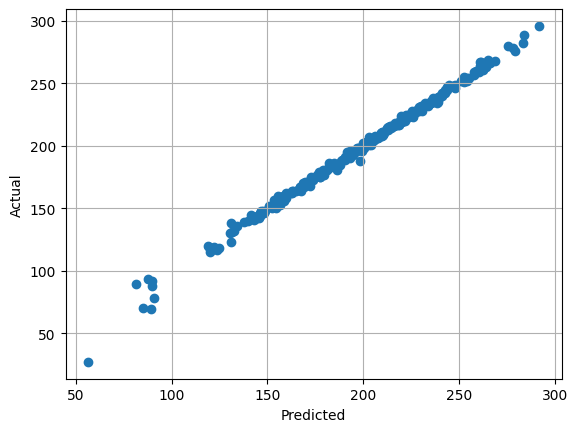

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y_pred, y_test)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.grid(True)
plt.plot()

#Best Result!! Linear Line!!

[]

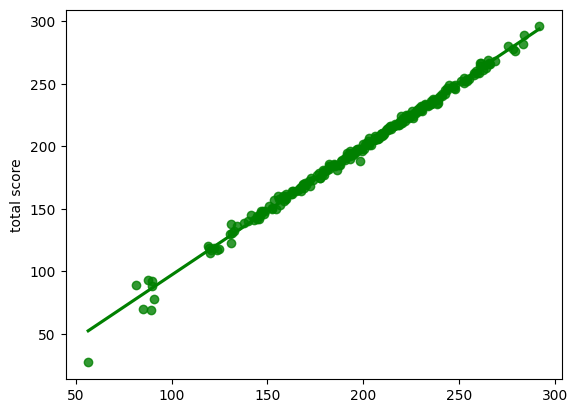

In [21]:
import seaborn as snb

snb.regplot(x=y_pred, y=y_test, ci=None, color='green')
plt.plot()